# Space missions data understanding, visualization and analysis

Who does not love Space? 
This DataSet was scraped from https://nextspaceflight.com/launches/past/?page=1 and includes all the space missions since the beginning of Space Race (1957) 

![Image](https://i1.wp.com/matmatch.com/blog/wp-content/uploads/2019/03/AdobeStock_80273384-compressor.jpeg?resize=2000%2C1125&ssl=1)

## Introduction 

Ever since the start of world war when the USSR launched the first ever manmade sattelite into the space called the Sputnik, the world has taken great interests in trying to explore beyond the planet. Rocket science, Cosmology, Astronomy are the epitome of engineering and science that require extreme levels of theoretical as well as experimental work.

A lot of mathematics goes behind when and where should a space launch take place for reaching it's destination at least possible resistance and with highest probability of success. At the same time, extreme levels of engineering is done to simulate the similar space conditions back on earth and test the launch vehicles for any possible failures. All these space missions require years of hard work, research and tests for success.

## Importing the libraries

In [1]:
import numpy as np  # Numpy helps us to do complex and high-level mathematical functions on large,
                    # multi-dimentional array and matrices
    
import pandas as pd # Pandas offers us data structures and operations for manipulating numerical 
                    #tables and time series
    
import matplotlib.pyplot as plt # Matplotlib helps us to embed plots into applications, commonly used
                                # for data visualisation
    
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative 
                      # statistical graphics.
    
sns.set_theme(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid'

import plotly.express as px # Plotly is yet another data visualisation and interactive open-source library.
                            # Plotly graph objects are a high-level interface to plotly which are easy to use

## Reading and making a very basic understanding of the dataset

In [2]:
df = pd.read_csv("Space_Missions.csv")# Reads the .csv file and converts 
                                                                             # to pandas Dataframe Object

In [3]:
df.head()# Shows top rows of the dataset (default value-5)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
df.info() # Gathering more knowledge about the data like number of rows and columns, datatype and not-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [5]:
df.shape # shape of the dataframe object

(4324, 9)

Let us quickly try to understand each of the columns and what they mean.

- **Company name** : The space organisation undertaking the mission
- **Location** : The point of spacecraft launch on earth
- **Datum** : Date and time of liftoff
- **Detail** : Name and type of the spaceship
- **Status of rocket** : Whether the space craft is still under commission and active in it's mission
- **Rocket** : Cost of the mission in million dollars
- **Status Mission** : Whether the mission was successful.

Any other columns are not required and we will drop them.

## Feature Extraction and Data Cleaning

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)# Dropping the unwanted rows

In [8]:
df.columns # For displaying all the columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

If we notice the Rocket column carefully, we will see that there is a space before the word 'Rocket'. We will fix this before proceeding

In [9]:
df=df.rename(columns={' Rocket':'Rocket'})# Renaming the column

In [10]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Rocket', 'Status Mission'],
      dtype='object')

If we look at the location column, we will find that name of the launch site is combined with the country. We must seperate out the country to have a more meaningfull insight into the data.

In [11]:
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])
# We cant directly use a function on a dataframe object. So, we use apply method.

In [12]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


As we did for the location column, we also need to seperate the year from the Datum column. We can always extract the year by using split but we have a very simple workaround by using a method in pandas library.
to_datatime converts time in any format to a proper datetime format from which details such as year,month and hour can be extracted very easily.

In [13]:
df['DateTime'] = pd.to_datetime(df['Datum']) 
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)# Extracting the year from Datum column and 
                                                                 # putting it in DateTime Column

In [14]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020


In [15]:
df["Launch_Site"] = df["Location"].apply(lambda location: ", ".join(location.split(", ")[:-1]))
# Seperating the Launch Site information and putting it in Launch_Site Column

In [16]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year,Launch_Site
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020,"LC-39A, Kennedy Space Center, Florida"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00,2020,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020,"Pad A, Boca Chica, Texas"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020,"Site 200/39, Baikonur Cosmodrome"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020,"SLC-41, Cape Canaveral AFS, Florida"


In [17]:
df['Rocket'].unique()# For all unique values for the column Rocket

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

Now we see that there are commas for some numbers, so we have to take out that comma so that we can convert it to float

In [18]:
df['Rocket'] = df['Rocket'].fillna(0.0).str.replace(',', '')

In [19]:
df['Rocket'].unique()

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5000.0 ', '1160.0 ',
       '59.0 ', '63.23 '], dtype=object)

## Data Visualisation

### Company

#### Countplot of Space Missions by Companies

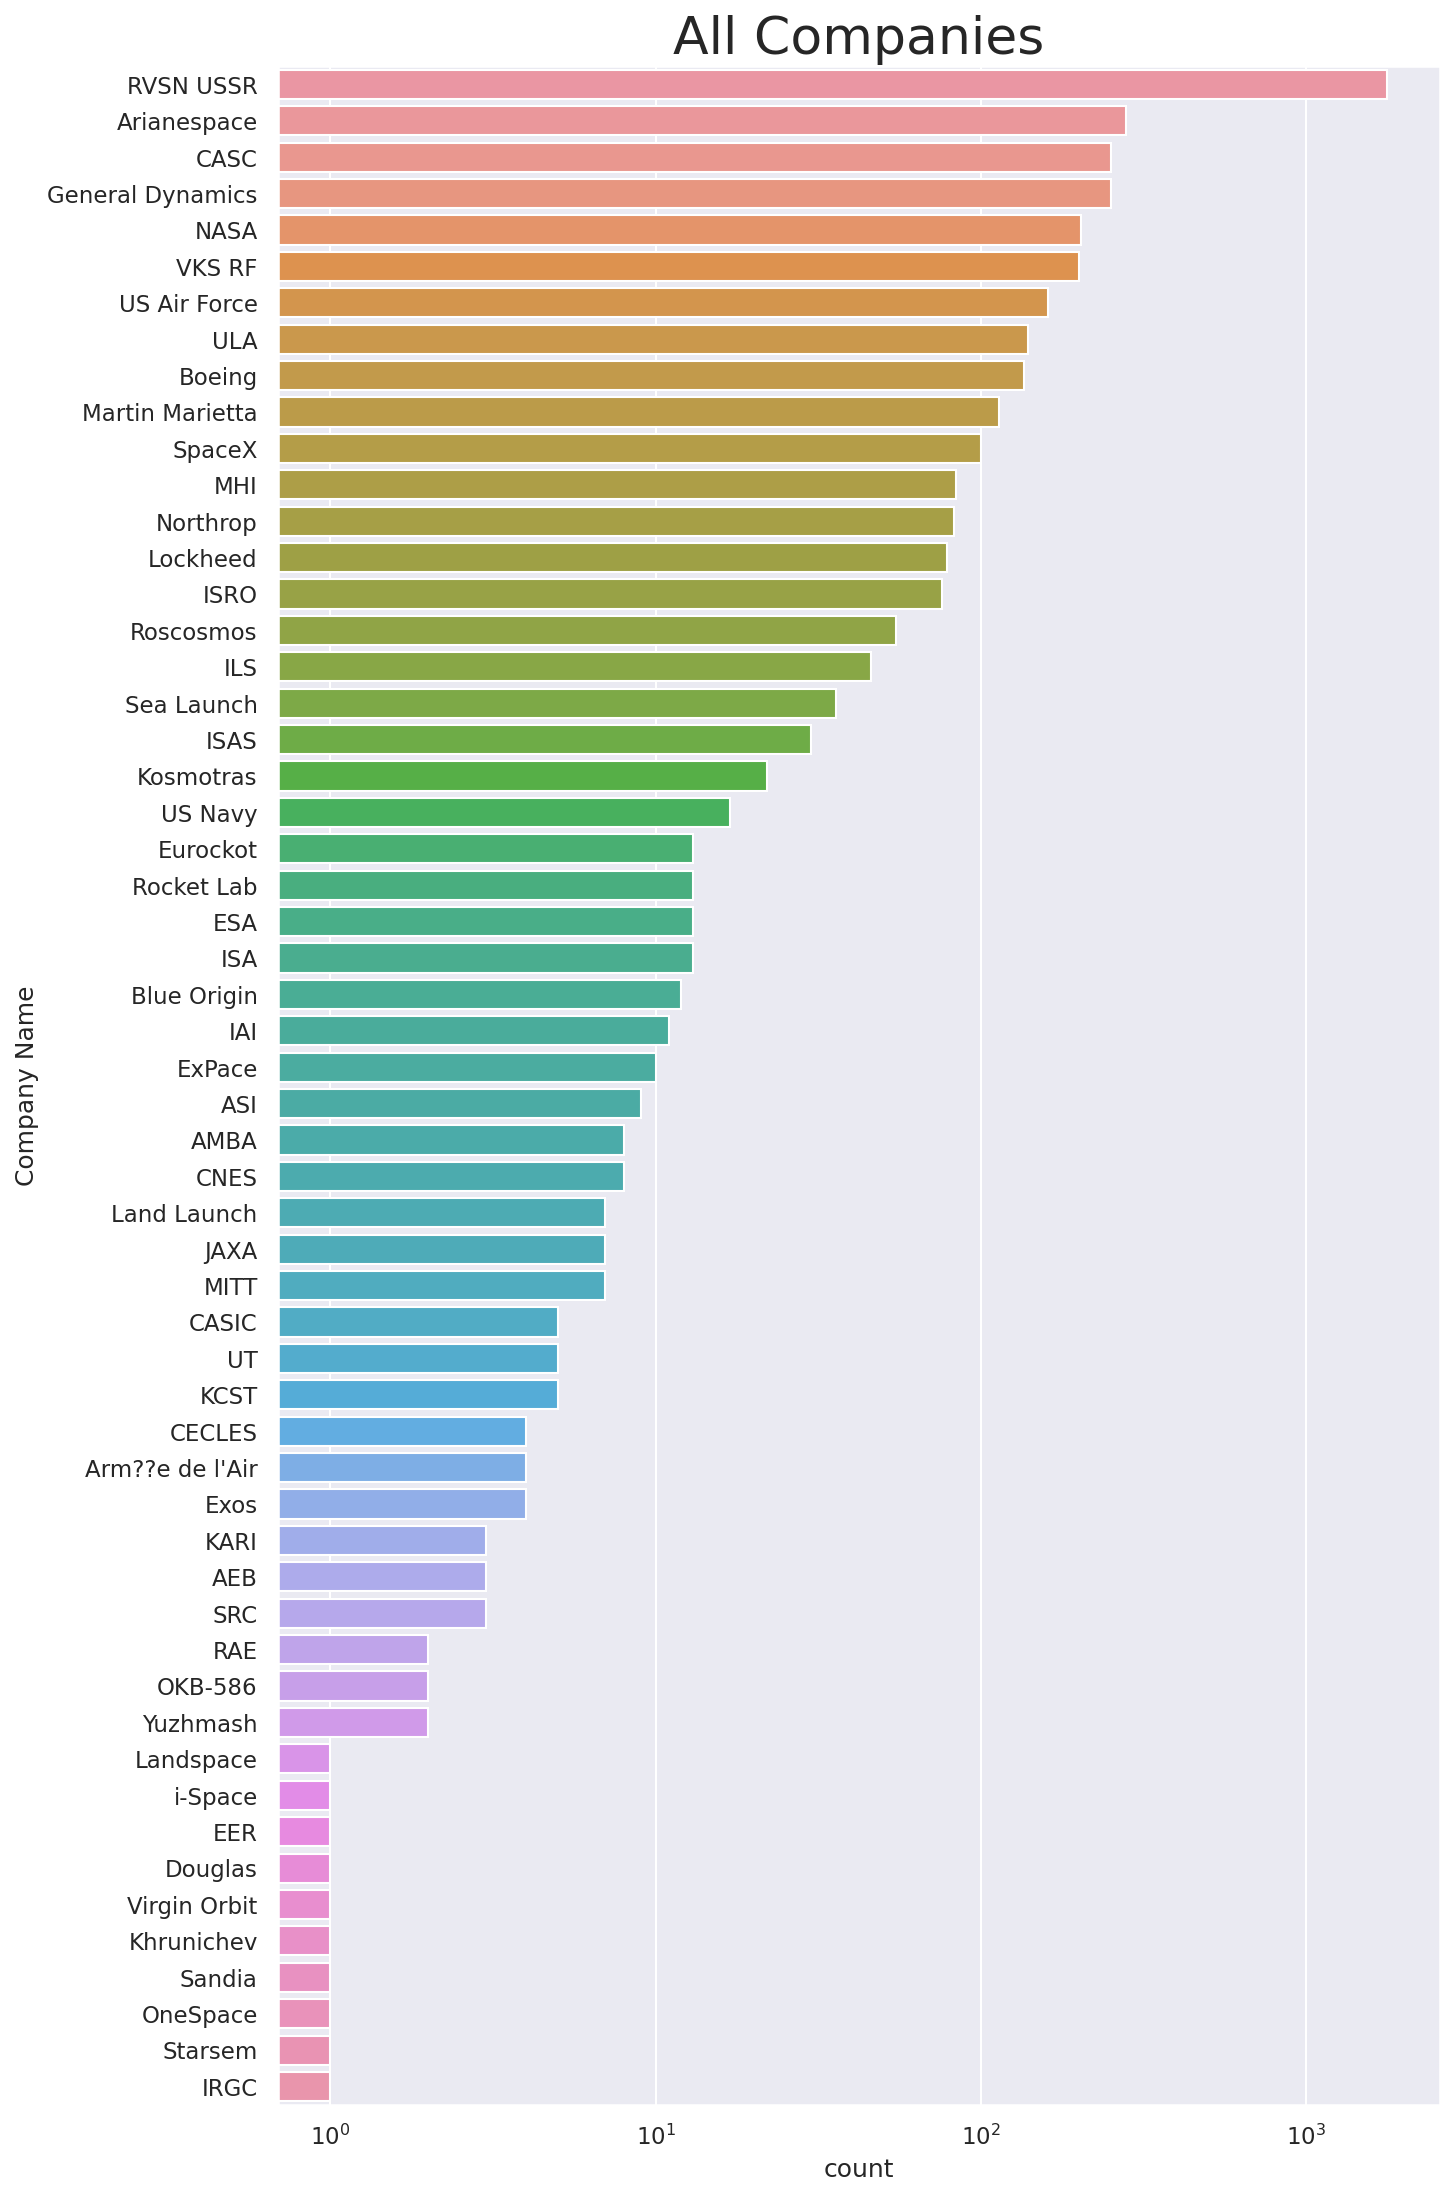

In [20]:
plt.figure(figsize=(10,18),dpi=150)
ax = sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)
ax.set_xscale("log")# Sets the scale to logarithmic value
plt.title('All Companies',size=25)
plt.show()

**RVSN USSR is the company to launch the most rockets. Also, RSVN USSR does not exist anymore after the disintegration of USSR. Roscosmos is the new space agency of Russia which sits on the 16th place in our list.**

#### Top 20 space companies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



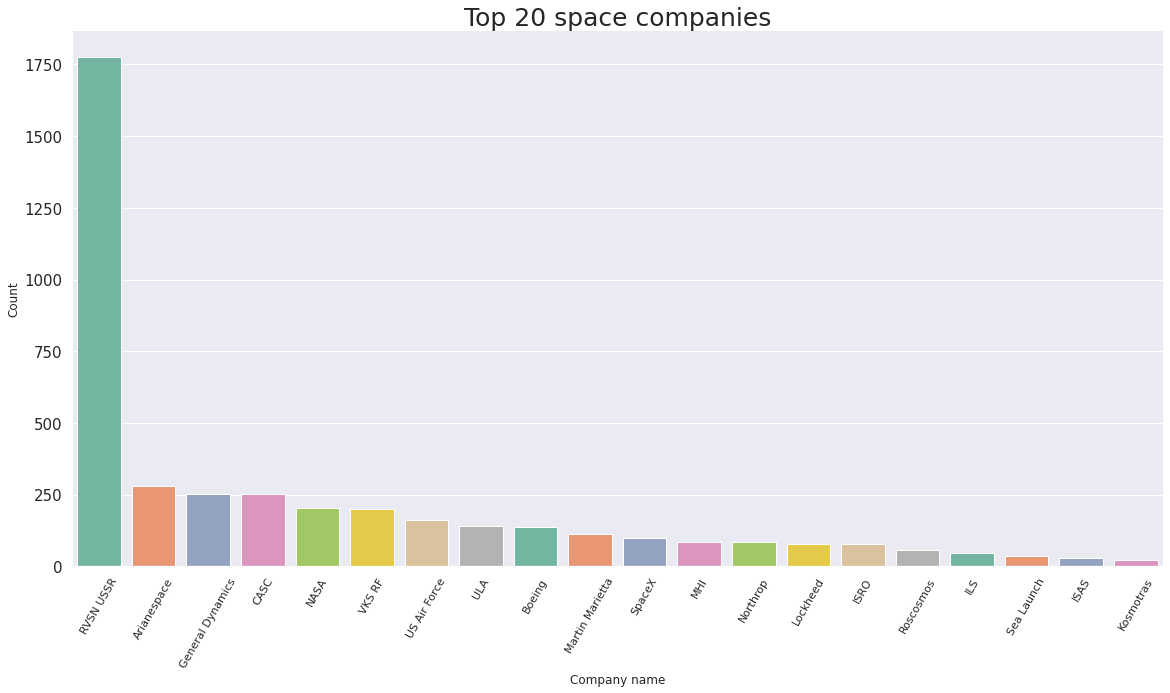

In [21]:
df['Count']=1
df_comps=df.groupby('Company Name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_comps=df_comps.head(20)
sns.catplot('Company Name','Count',data=df_comps,palette='Set2',kind='bar',aspect=2,height=8)
plt.title('Top 20 space companies',size=25)
plt.xticks(rotation=60)
plt.xlabel('Company name')
plt.yticks(size=15)
plt.show()

#### The top 15 companies in satellite mission

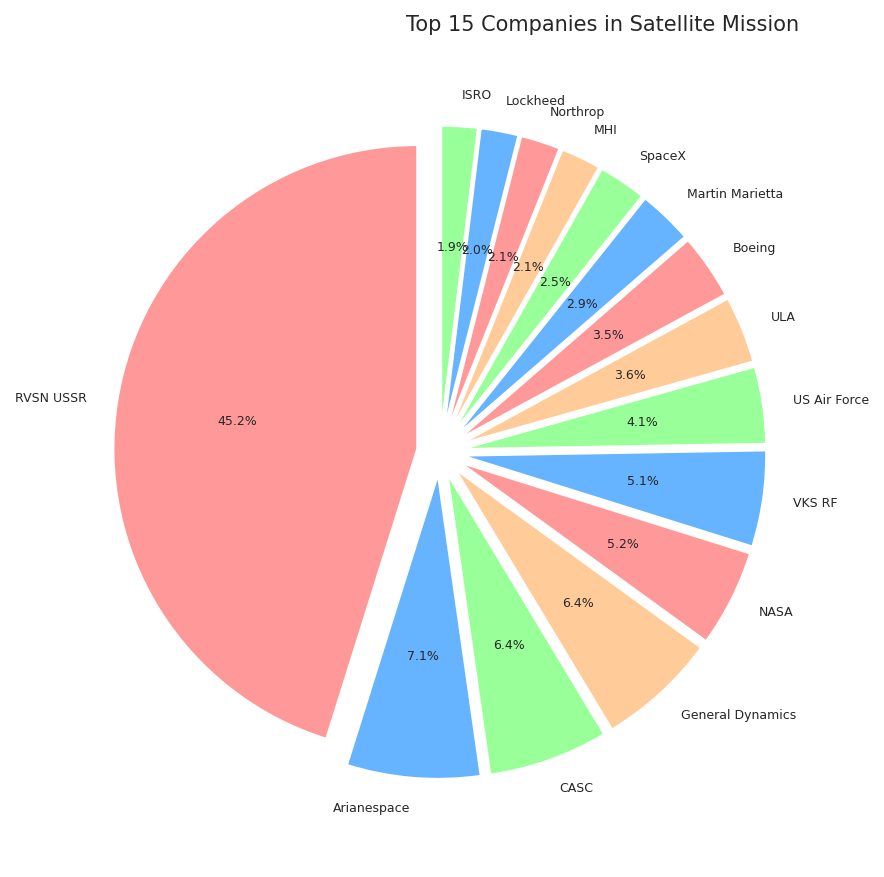

In [22]:
labels=list(df["Company Name"].value_counts()[:15].keys())
sizes=df["Company Name"].value_counts()[:15]
explode=[]
for i in labels:
    explode.append(0.075)
plt.figure(figsize=(6,6),dpi=150)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.1f%%', startangle=90, shadow=False,
        textprops={'fontsize': 6},colors=colors)
plt.title("Top 15 Companies in Satellite Mission", fontsize=10, loc="right")
plt.axis("equal")
plt.tight_layout()

### Location

#### Countplot of Missions by Countries

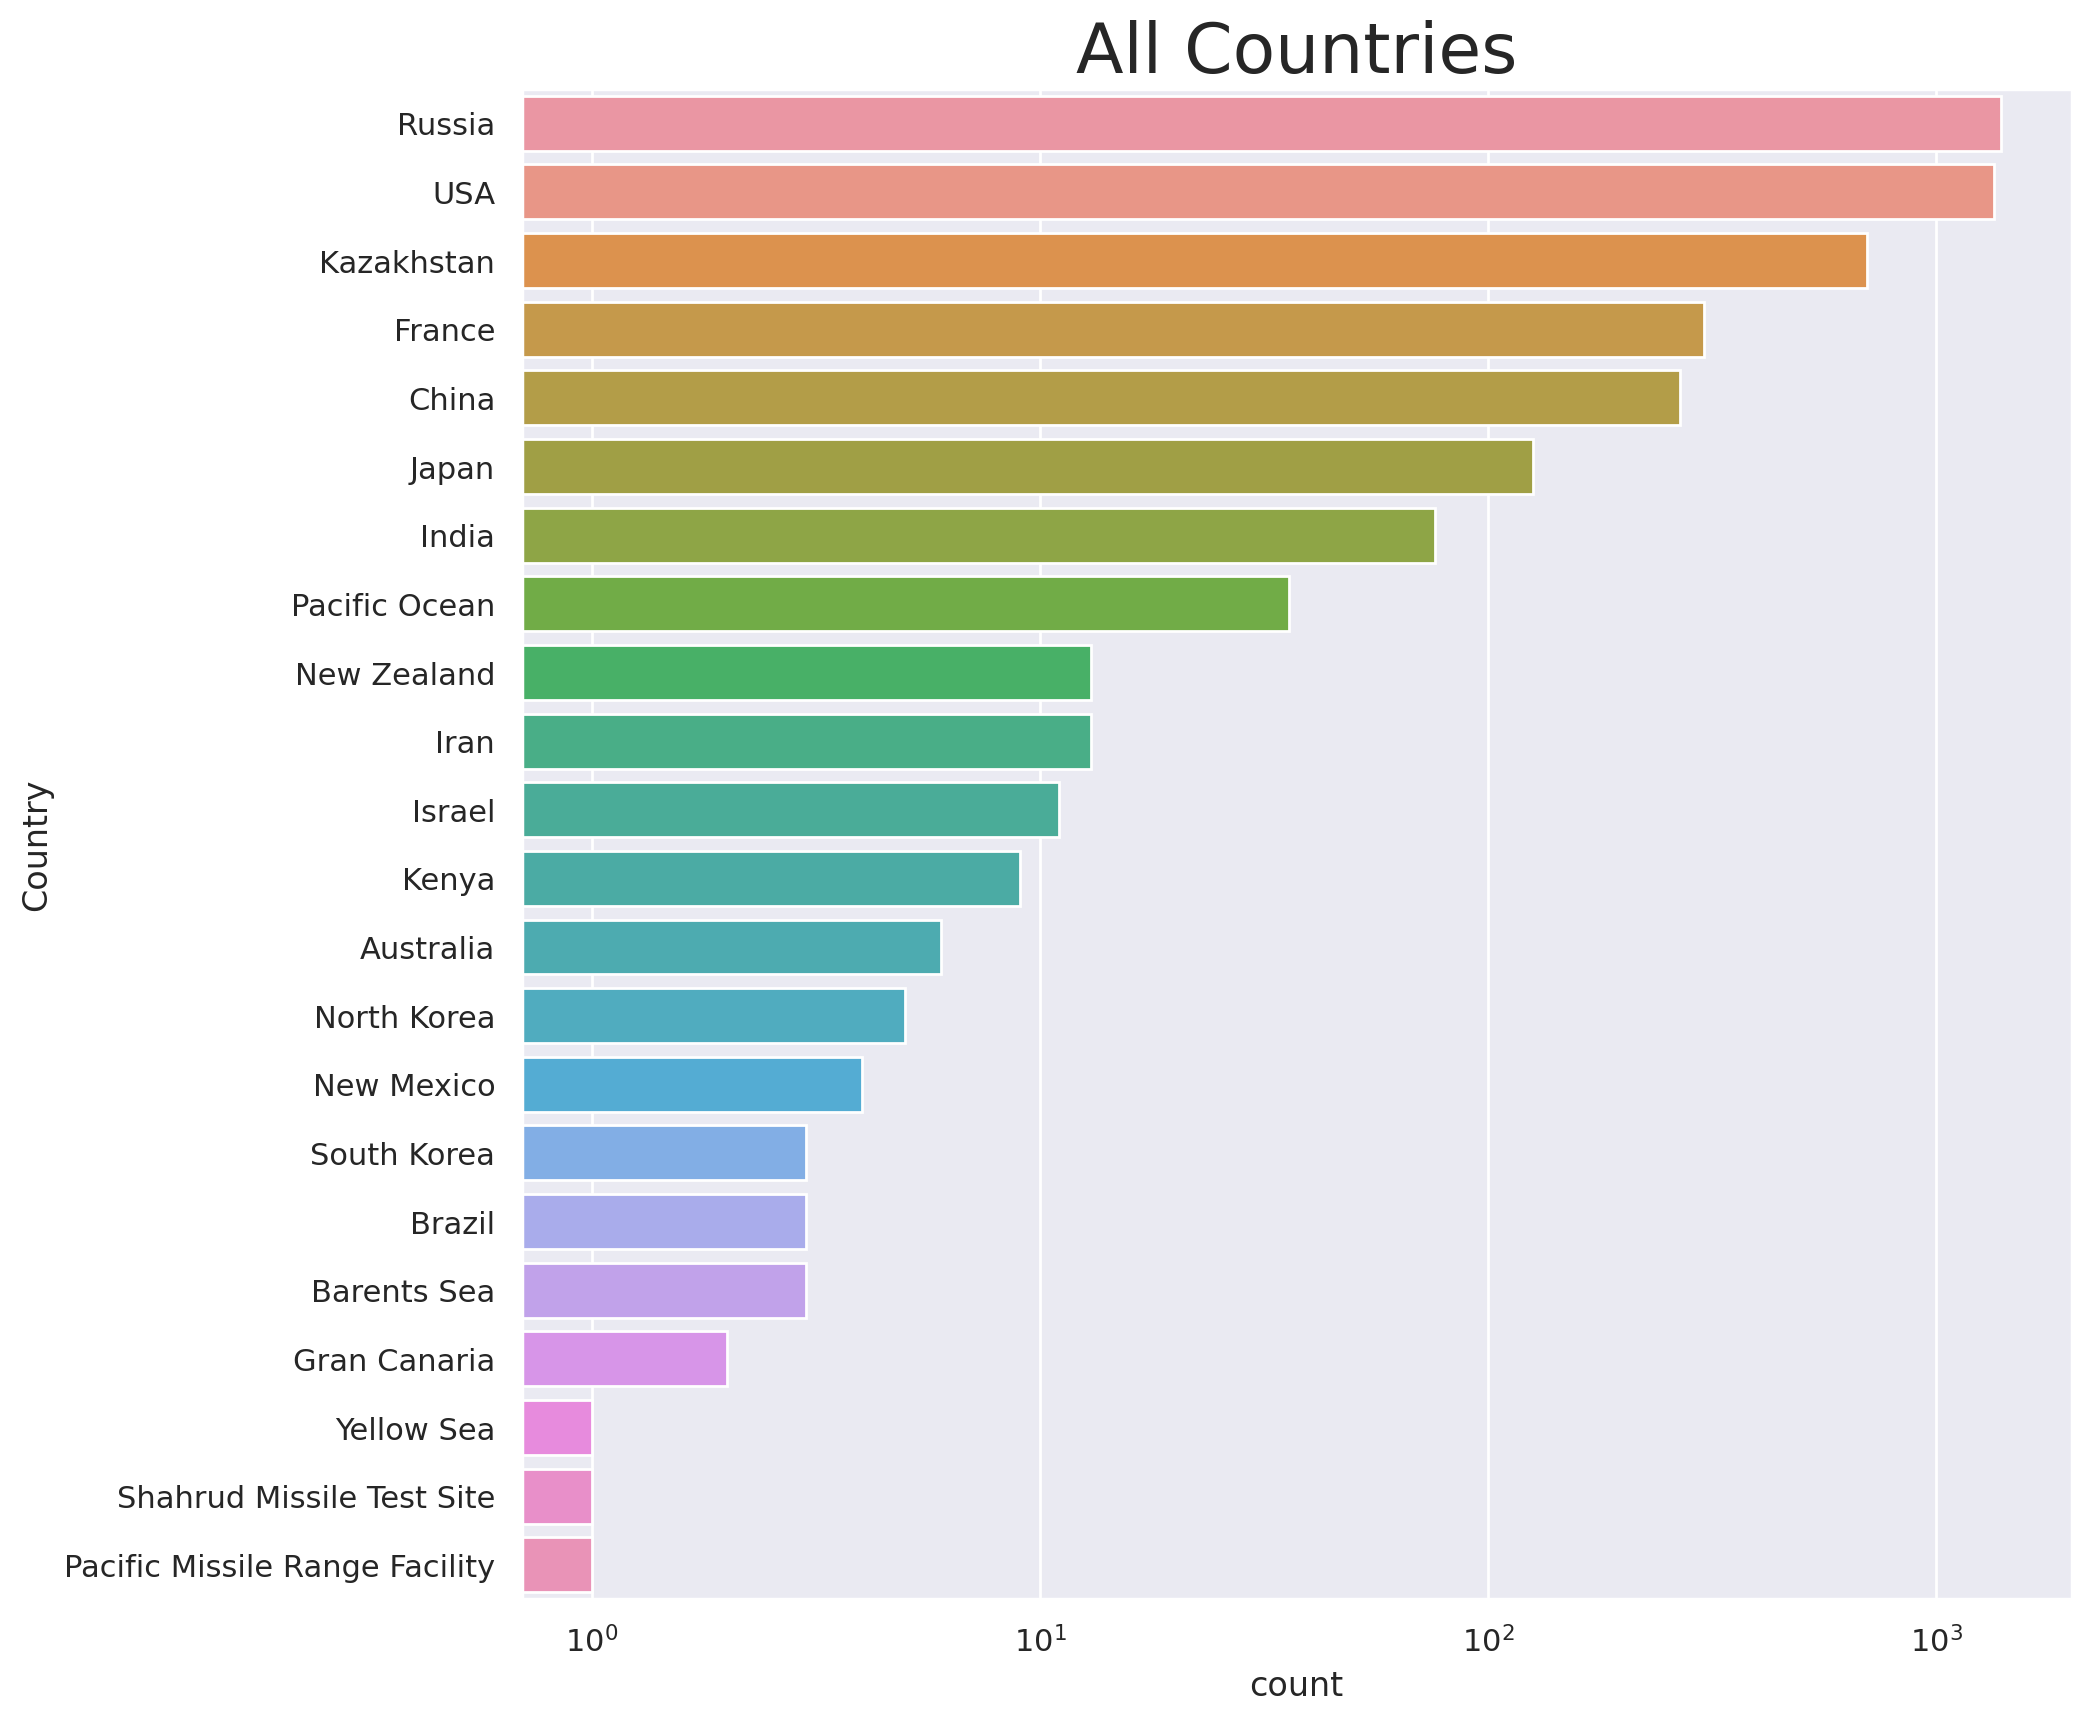

In [23]:
plt.figure(figsize=(10,10),dpi=200)
ax = sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
ax.set_xscale("log")
plt.title('All Countries',size=25)
plt.show()

**We infer that Russia had the most space missions, also quite evident from the fact that RSVN USSR is the company to have the most space launches. USA was just short of them while India sits at 7th place.**

#### Top 10 Countries leading the space launches

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 1500x1200 with 0 Axes>

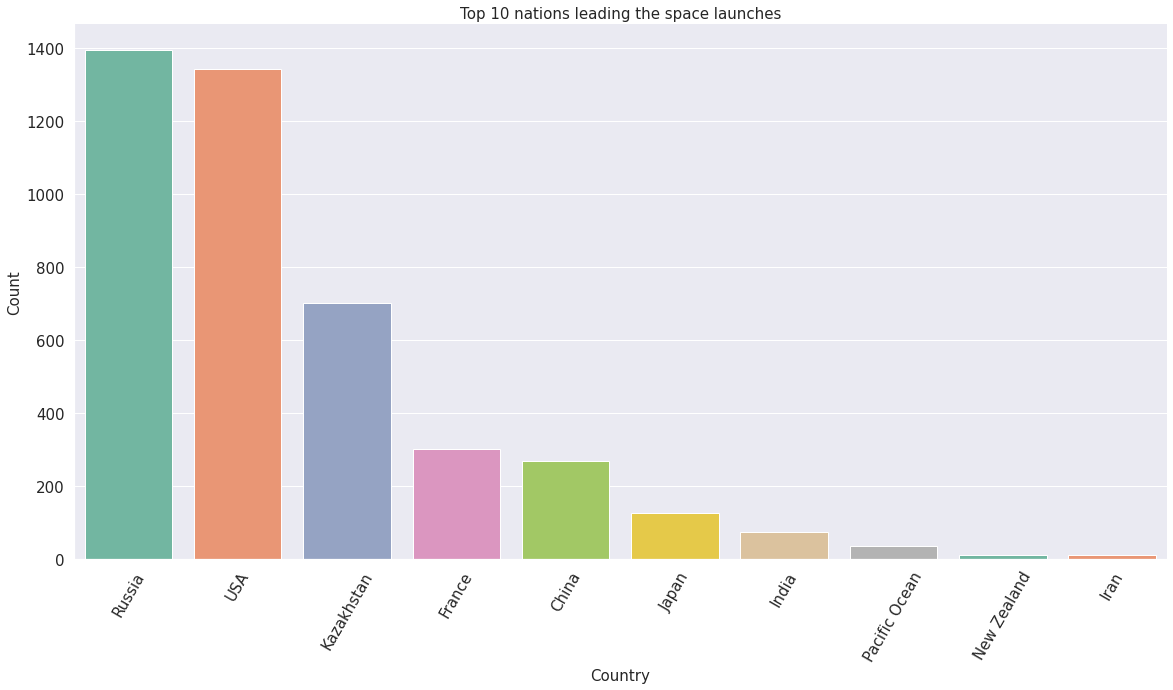

In [24]:
df_countries=df.groupby('Country')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_countries=df_countries.head(10)
plt.figure(figsize=(10,8),dpi=150)
sns.catplot('Country','Count',data=df_countries,aspect=2,height=8,kind='bar',palette='Set2')
plt.title('Top 10 nations leading the space launches',size=15)
plt.xticks(size=15,rotation=60)
plt.xlabel('Country',size=15)
plt.ylabel('Count',size=15)
plt.yticks(size=15)
plt.show()

#### Countplot of Missions by Launch Sites

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 129 missing from current font.



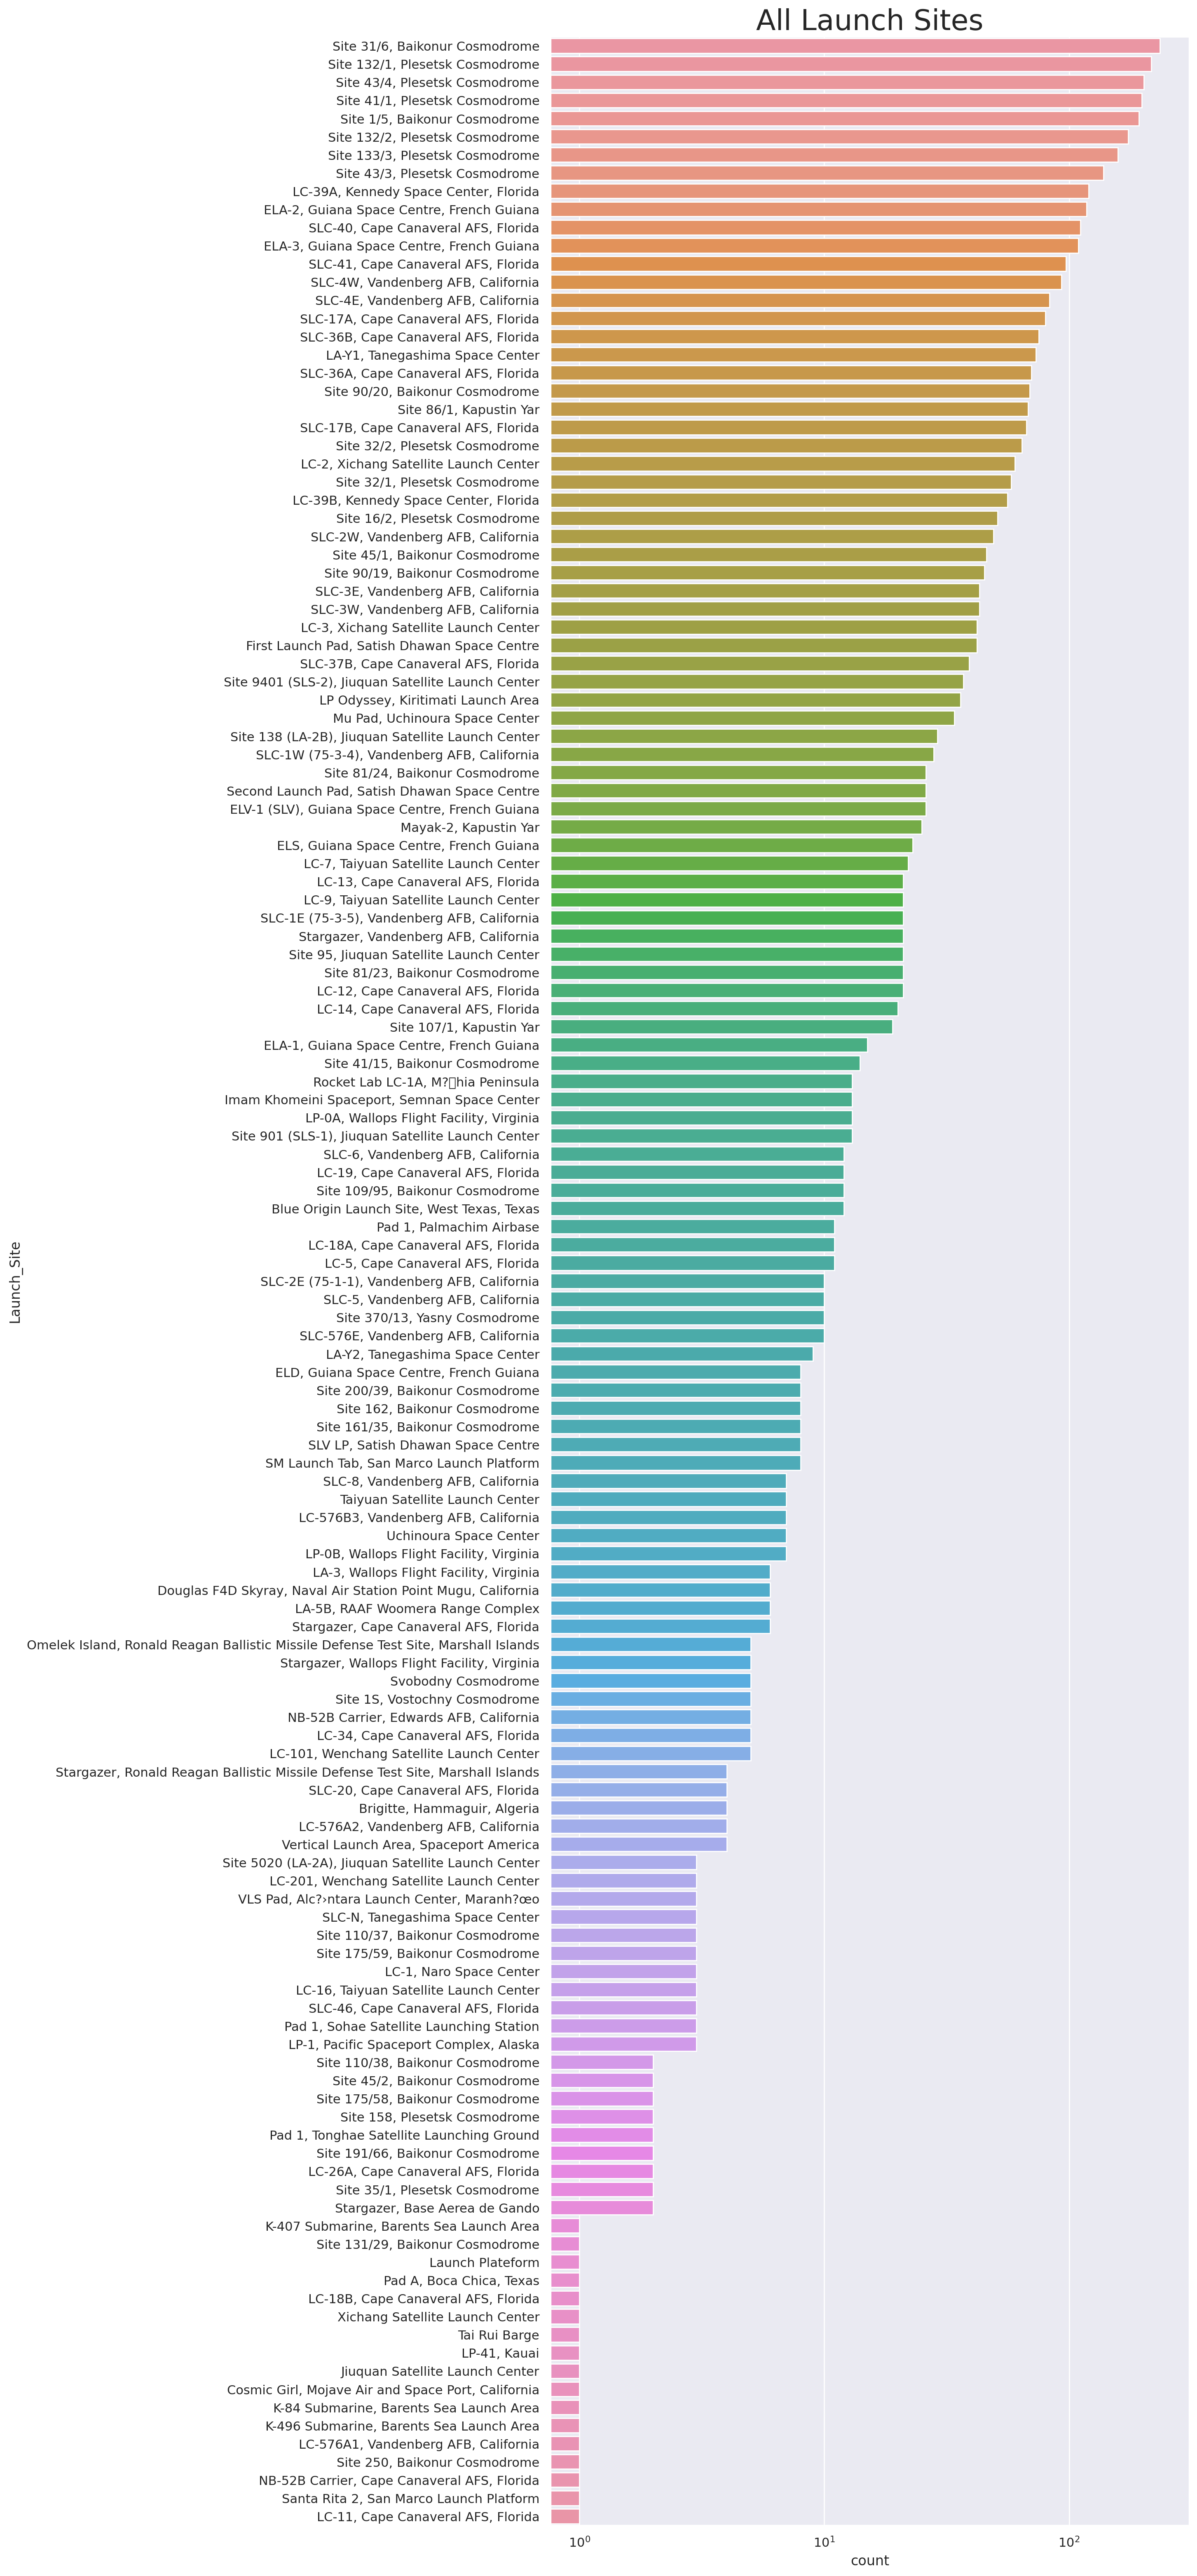

In [25]:
plt.figure(figsize=(10,40),dpi=200)
ax = sns.countplot(y="Launch_Site", data=df, order=df["Launch_Site"].value_counts().index)
ax.set_xscale("log")
plt.title('All Launch Sites',size=25)
plt.show()

**From this plot, we can see that Site 31/6, Baikonur Cosmodrone is the most used launch site and it is one of the testing sites of RSVN USSR.**

### Datum

#### Countplot of launches by year

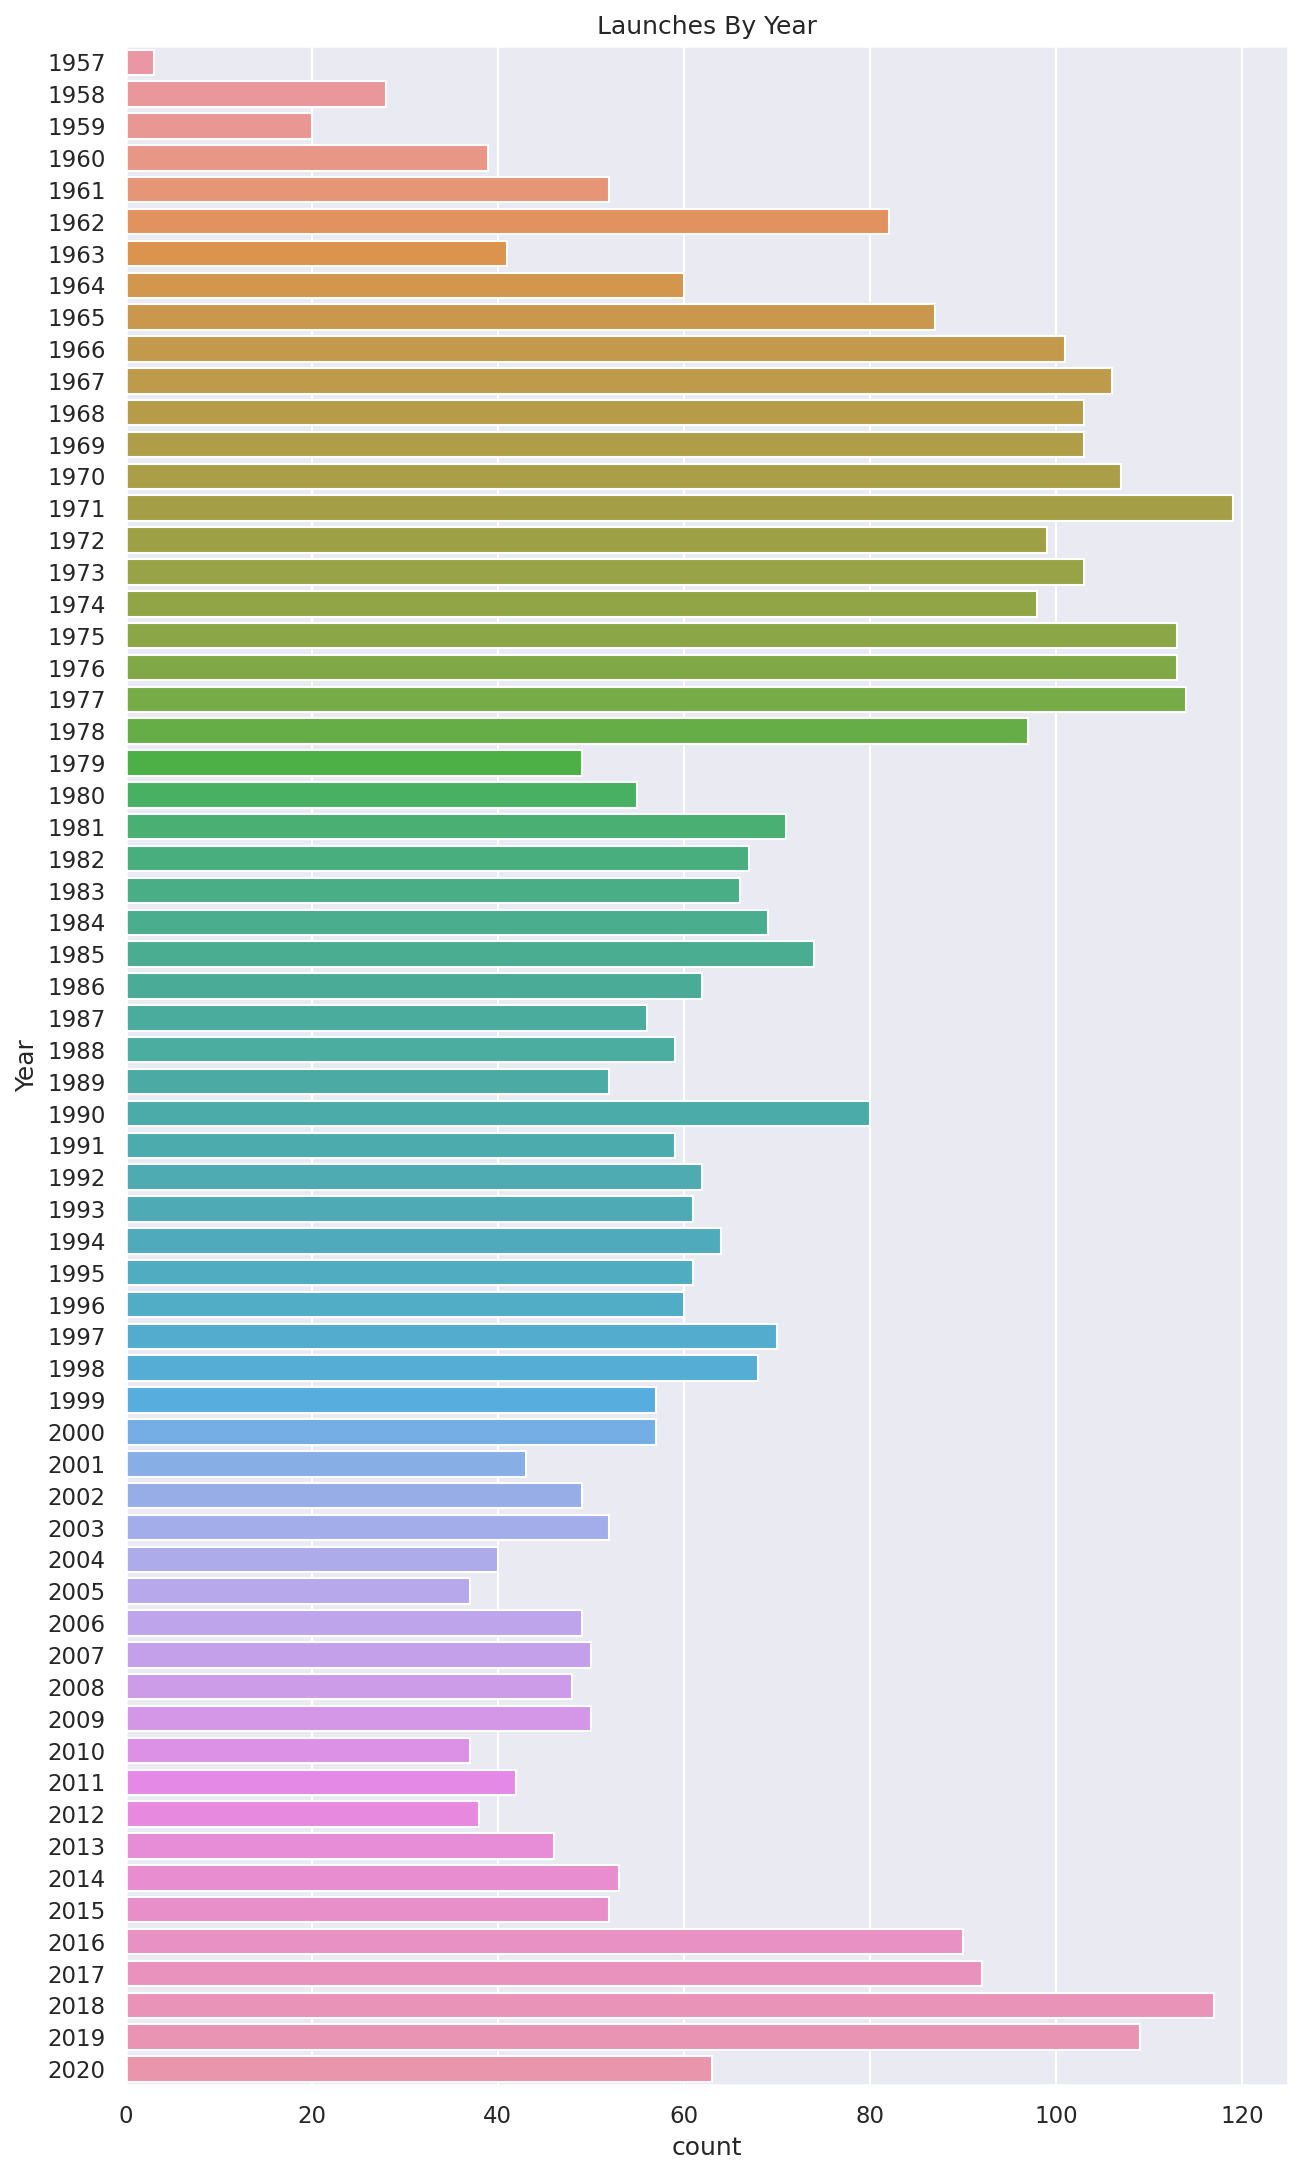

In [26]:
plt.figure(figsize=(10,18),dpi=150)
sns.countplot(data=df,y='Year')
plt.title("Launches By Year")
plt.show()

**So we infer from this plot that 1972 was the year in which most rockets were launched. It was the year when Apollo 16 was launched and the space race was at its peak. 2018 was the year with most launches after 1972.**

#### Frequency of Launches by Year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



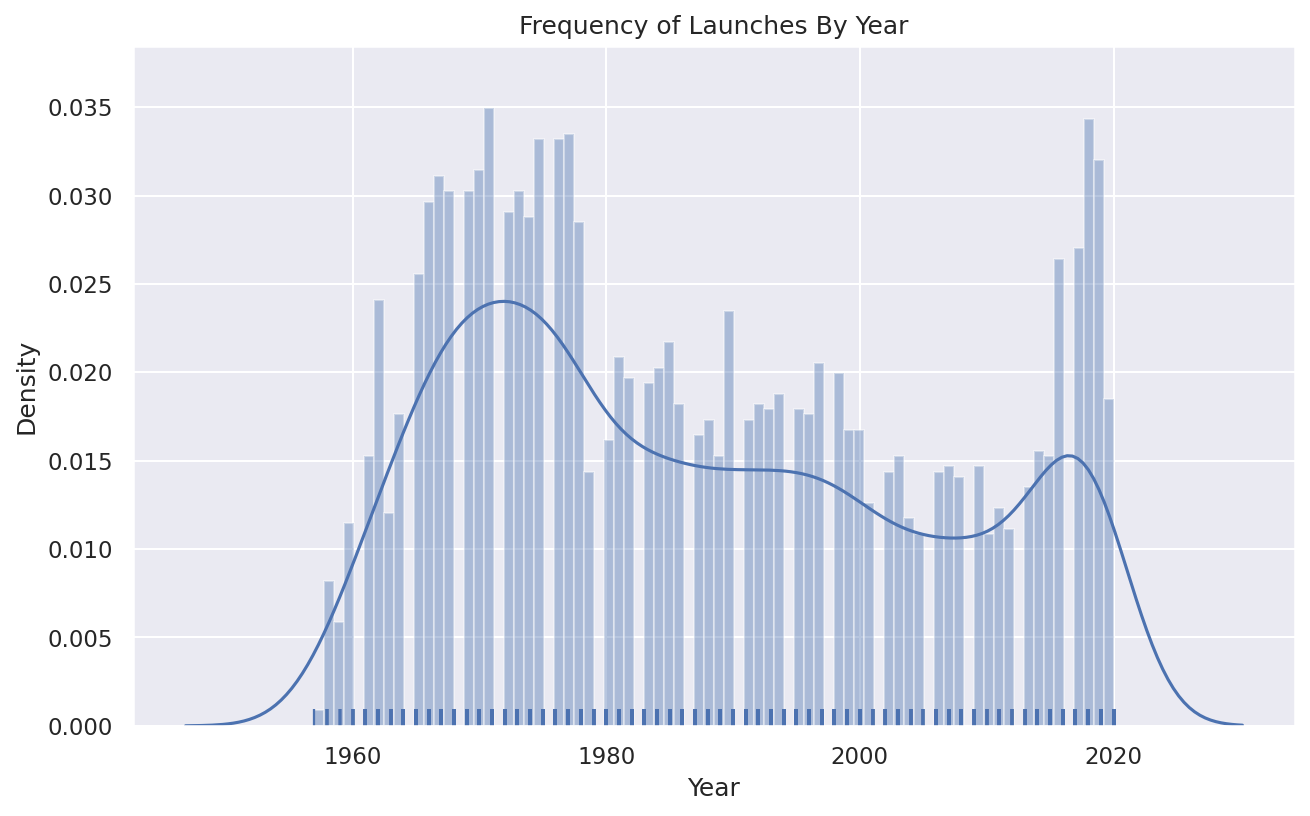

In [27]:
plt.figure(figsize=(10,6),dpi=150)
sns.distplot(df['Year'],kde=True,rug=True,bins=80)
plt.title("Frequency of Launches By Year")
plt.show()

#### Number of Launches By Month

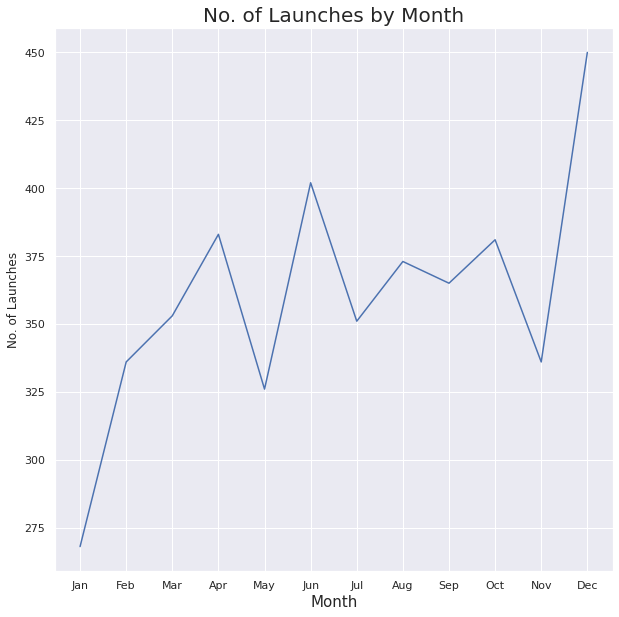

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('No. of Launches by Month', fontsize=20)
month_df=pd.DataFrame()
df['Month']=df['Datum'].apply(lambda datum: datum.split()[1])
month_df['Month']=df['Month'].value_counts().index
month_df['Launches']=df['Month'].value_counts().values
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorter = [order.index(i) for i in month_df['Month']]
month_df['Sorter']=sorter
sns.lineplot(x = 'Month', y = "Launches", data=month_df.sort_values(by='Sorter'), sort=False)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('No. of Launches')
plt.show()

**We can see that moat missions happen between November and December. This can be due to the fact that weather is quite good at this time of the year**

#### Launches in 2020 by different Companies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



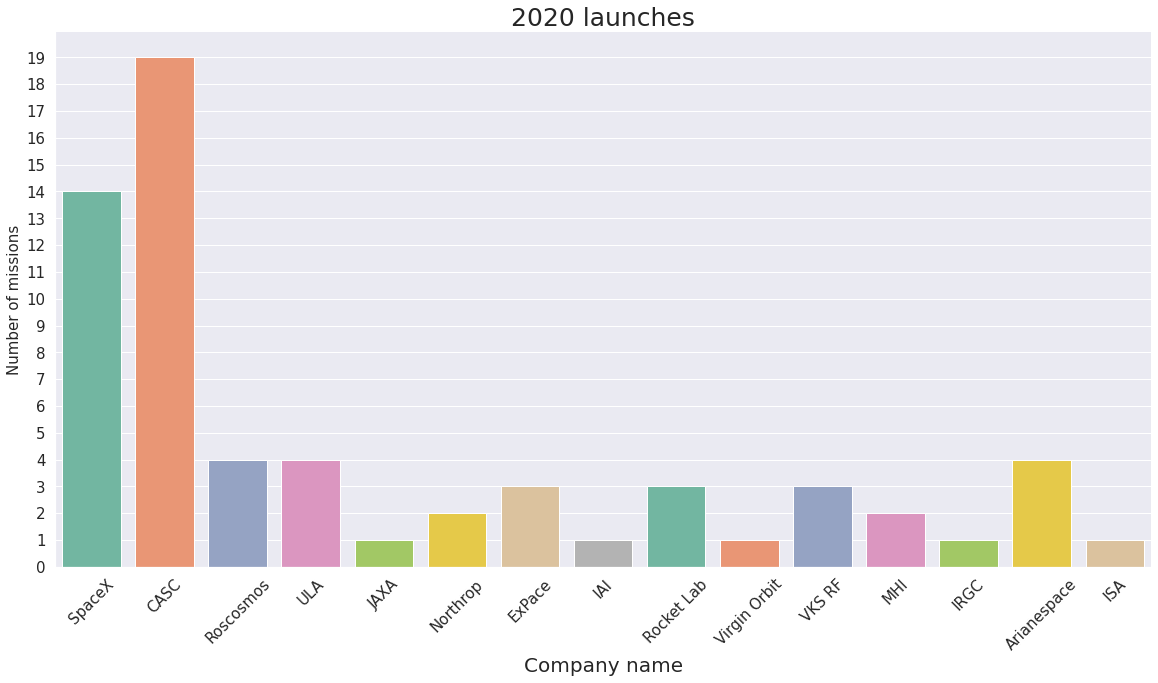

In [29]:
df_2020=df[df['Year']==2020]
sns.catplot('Company Name',data=df_2020,kind='count',aspect=2,height=8,palette='Set2')
plt.yticks(np.arange(20))
plt.title('2020 launches',size=25)
plt.xlabel('Company name',size=20)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.ylabel('Number of missions',size=15)
plt.show()

**Launches in 2020 are led by Elon Musk's Space-X, while we see that new companies like Rocket Lab, Virgin Orbit are also launching quite a few **

### Money

#### Money Spent by Companies

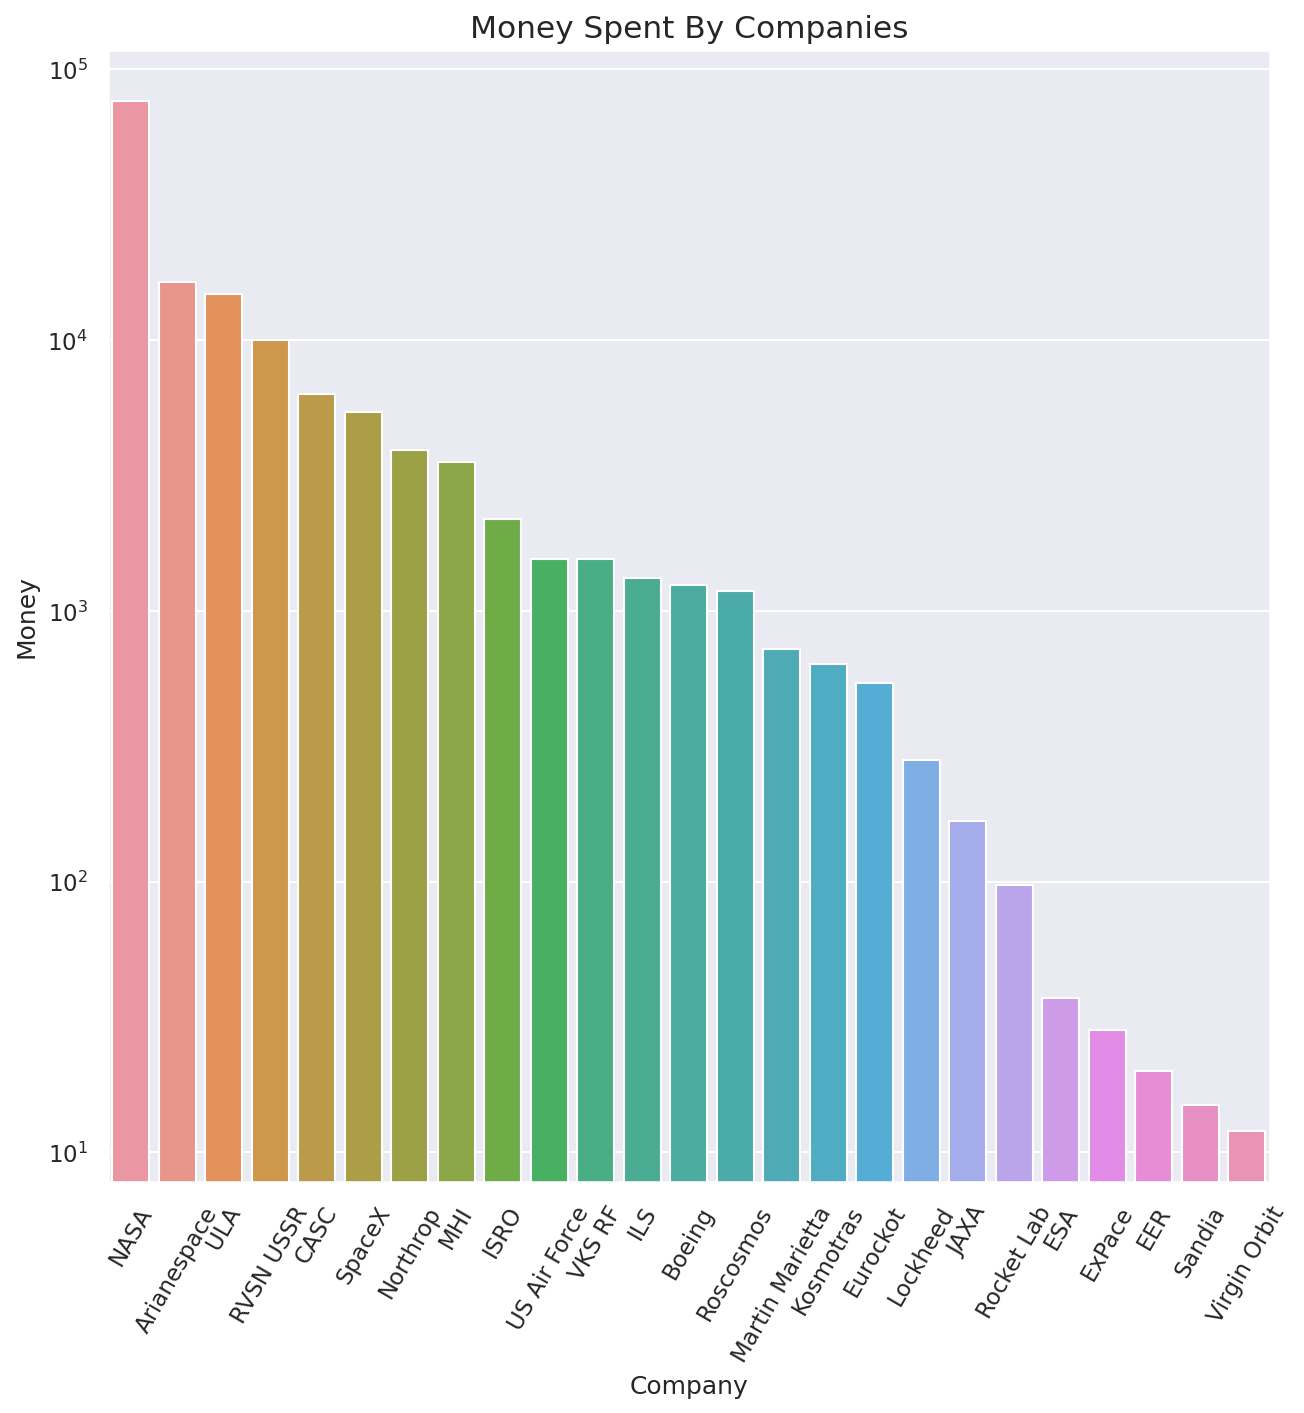

In [30]:
df.Rocket = df.Rocket.apply(lambda x: str(x).strip()).astype('float64')
data = df.groupby(['Company Name'])['Rocket'].sum().reset_index()
data = data[data['Rocket'] > 0].sort_values(by='Rocket', ascending=False)
data.columns = ['Company', 'Money']
plt.figure(figsize=(10,10),dpi=150)
plt.title("Money Spent By Companies",size=15)
ax=sns.barplot(data=data,x='Company',y='Money')
ax.set_yscale("log")
plt.xticks(rotation=60)
plt.show()

**While RSVN USSR may have the most launches but NASA tops the charts when it comes to spending Money.**

### Mission and Rocket Status

#### Countplot of Mission Status

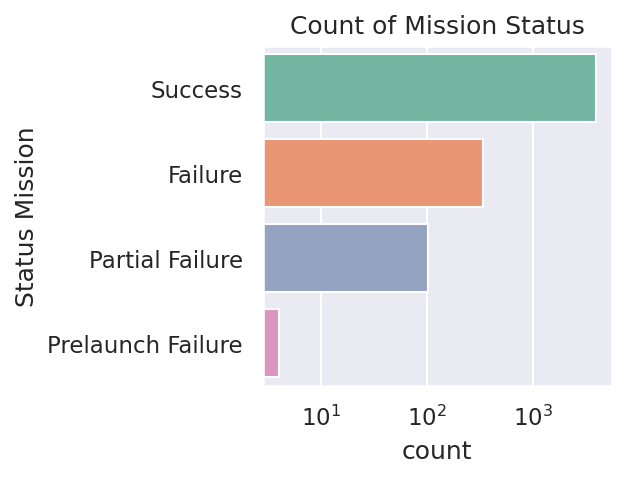

In [31]:
plt.figure(figsize=(3,3),dpi=150)
ax = sns.countplot(data=df,y='Status Mission',order=df["Status Mission"].value_counts().index, palette="Set2")
ax.set_xscale("log")
plt.title("Count of Mission Status")
plt.show()

**From the plot, its clearly visible that most of the missions were successful and very few were a prelaunch failure**

#### Pie Chart of Mission Status

In [32]:
fig = px.pie(df,names='Status Mission', title='Status of Mission',width=600, height=400)
fig.show()

**Roughly 90% of the missions till date were a success.**

#### Countplot of Missions by Rocket Retirement Status

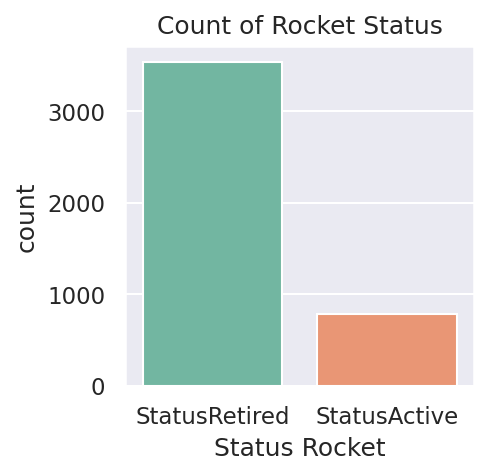

In [33]:
plt.figure(figsize=(3,3),dpi=150)
sns.countplot(x="Status Rocket",data=df,order=df["Status Rocket"].value_counts().index,palette='Set2')
plt.title("Count of Rocket Status")
plt.show()

**Clearly, most of the launch vehicles used or the satellites launched are retired.**

# ISRO Data Analysis
![](https://www.isro.gov.in/sites/default/files/galleries/गैलरी/19take.jpg)

In [34]:
df_isro=df[df["Company Name"]=="ISRO"]

In [35]:
df_isro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 72 to 2502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    76 non-null     object 
 1   Location        76 non-null     object 
 2   Datum           76 non-null     object 
 3   Detail          76 non-null     object 
 4   Status Rocket   76 non-null     object 
 5   Rocket          67 non-null     float64
 6   Status Mission  76 non-null     object 
 7   Country         76 non-null     object 
 8   DateTime        76 non-null     object 
 9   Year            76 non-null     int64  
 10  Launch_Site     76 non-null     object 
 11  Count           76 non-null     int64  
 12  Month           76 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 8.3+ KB


In [36]:
df_isro.head(10)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year,Launch_Site,Count,Month
72,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Wed Dec 11, 2019 09:55 UTC",PSLV-QL | RISAT 2BR1,StatusActive,21.0,Success,India,2019-12-11 09:55:00+00:00,2019,"First Launch Pad, Satish Dhawan Space Centre",1,Dec
80,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Wed Nov 27, 2019 03:58 UTC",PSLV-XL | Cartosat-3 & Rideshares,StatusActive,31.0,Success,India,2019-11-27 03:58:00+00:00,2019,"Second Launch Pad, Satish Dhawan Space Centre",1,Nov
121,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Mon Jul 22, 2019 09:13 UTC",GSLV Mk III | Chandrayaan-2 lunar mission,StatusActive,62.0,Success,India,2019-07-22 09:13:00+00:00,2019,"Second Launch Pad, Satish Dhawan Space Centre",1,Jul
138,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Wed May 22, 2019 00:00 UTC",PSLV-CA | RISAT-2B,StatusActive,21.0,Success,India,2019-05-22 00:00:00+00:00,2019,"First Launch Pad, Satish Dhawan Space Centre",1,May
149,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Mon Apr 01, 2019 03:57 UTC",PSLV-QL | EMISAT & Rideshares,StatusActive,21.0,Success,India,2019-04-01 03:57:00+00:00,2019,"Second Launch Pad, Satish Dhawan Space Centre",1,Apr
164,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Thu Jan 24, 2019 18:07 UTC",PSLV-DL | Microsat-R,StatusActive,NaN,Success,India,2019-01-24 18:07:00+00:00,2019,"First Launch Pad, Satish Dhawan Space Centre",1,Jan
179,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Wed Dec 19, 2018 10:40 UTC",GSLV Mk II | GSAT-7A,StatusActive,47.0,Success,India,2018-12-19 10:40:00+00:00,2018,"Second Launch Pad, Satish Dhawan Space Centre",1,Dec
188,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Thu Nov 29, 2018 04:27 UTC",PSLV-CA | HySIS,StatusActive,21.0,Success,India,2018-11-29 04:27:00+00:00,2018,"First Launch Pad, Satish Dhawan Space Centre",1,Nov
195,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Wed Nov 14, 2018 11:38 UTC",GSLV Mk III | GSAT 29,StatusActive,62.0,Success,India,2018-11-14 11:38:00+00:00,2018,"Second Launch Pad, Satish Dhawan Space Centre",1,Nov
215,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Sun Sep 16, 2018 16:38 UTC",PSLV-CA | SSTL-1 & NovaSAR-S,StatusActive,21.0,Success,India,2018-09-16 16:38:00+00:00,2018,"First Launch Pad, Satish Dhawan Space Centre",1,Sep


#### Status Mission for ISRO

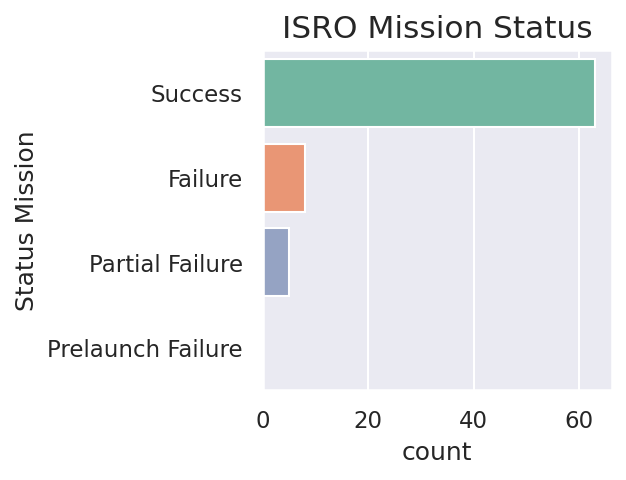

In [37]:
plt.figure(figsize=(3,3),dpi=150)
sns.countplot(data=df_isro,y='Status Mission',order=df["Status Mission"].value_counts().index, palette="Set2")
plt.title("ISRO Mission Status",size=15)
plt.show()

**There are no prelaunch failures and most missions were successful.**

#### COuntplot of launches by Year

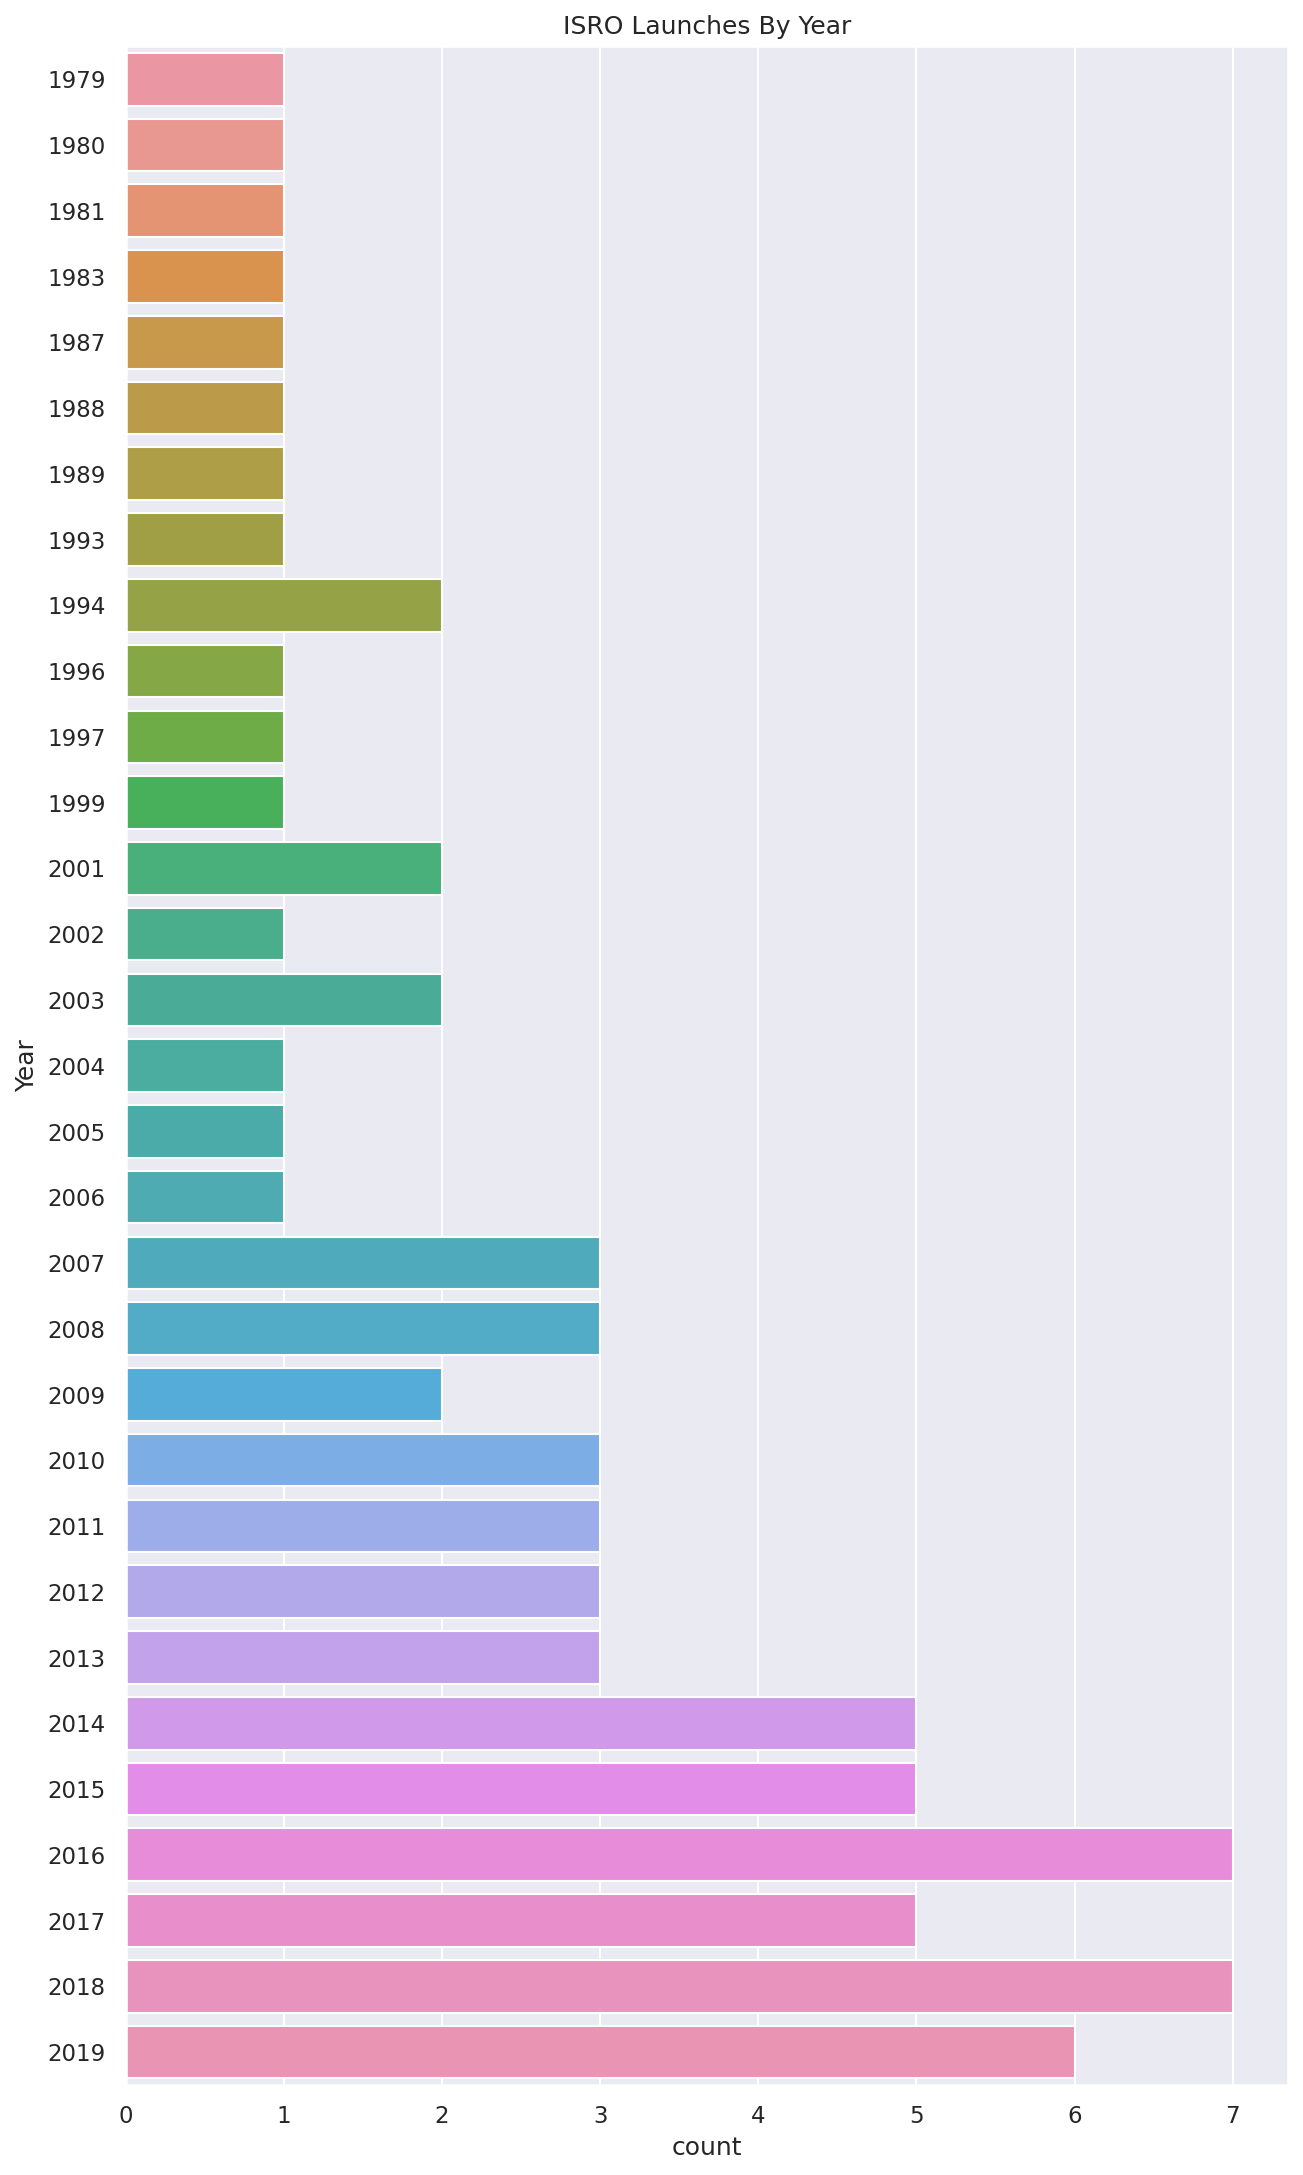

In [38]:
plt.figure(figsize=(10,18),dpi=150)
sns.countplot(data=df_isro,y='Year')
plt.title("ISRO Launches By Year")
plt.show()

**Now lets see which is the most used launch pad for isro**

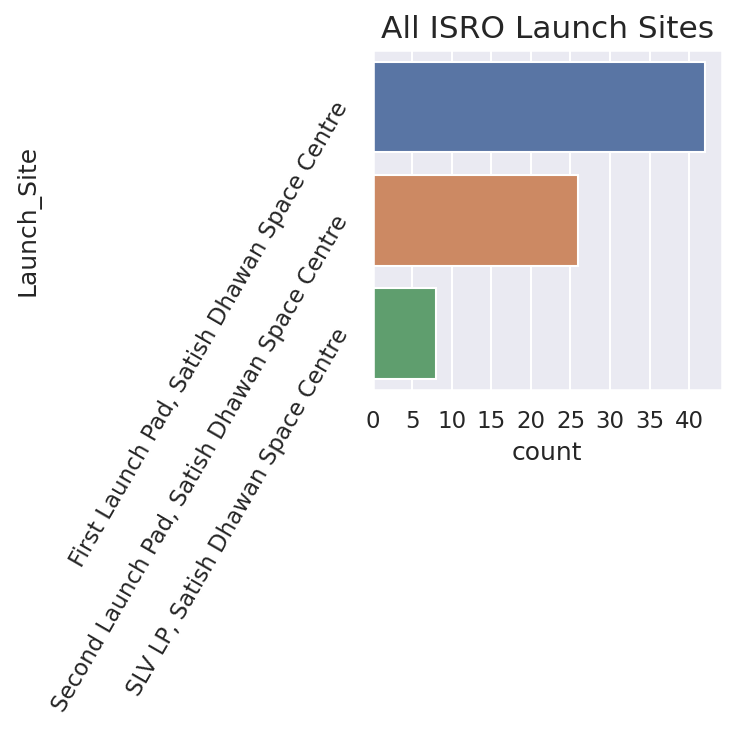

In [39]:
plt.figure(figsize=(3,3),dpi=150)
ax = sns.countplot(y="Launch_Site", data=df_isro, order=df_isro["Launch_Site"].value_counts().index)
plt.title('All ISRO Launch Sites',size=15)
plt.yticks(rotation=60)
plt.rc('xtick',labelsize=4)
plt.rc('ytick',labelsize=4)
plt.show()

**So, the most used site is First Launch pad, Satish Dhawan Space Center.**

In [40]:
df.to_csv(r'Space_Missions_Cleaned.csv',index=False)# Saving the cleaned df object into a csv file.

Visualisation of Top 10 companies with highest success rate. #2

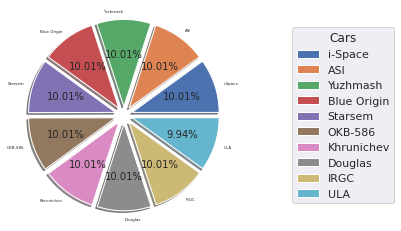

In [41]:

o=df.iloc[:,6]
b=df.iloc[:,0]
o=o.tolist()
des=[]
for i in range(len(o)):
    if o[i]=='Success':
        des.append(1)
    else:
        des.append(0)
a1 = pd.DataFrame(b)        
des=pd.Series(des,name="success")
b1=pd.DataFrame(des)
des=pd.concat([a1,des], axis=1)
des=des.groupby("Company Name")
f1=des.sum()
f=des.count()
g=f.iloc[:,0]
g=g.tolist()
g1=f1.iloc[:,0]
g1=g1.tolist()
ht=[]
for i in range(len(g)):
    ht.append(g1[i]/g[i]*100)
b=b.tolist()
g={'0'}
for i in b:
    g.add(i)
g.discard('0')
l=[]
for i in g:
    l.append(i)
l.sort()
ht2=pd.Series(ht,name="SP")
ht2=pd.DataFrame(ht2)
l1=pd.Series(l,name="Comany Name")
l1=pd.DataFrame(l1)
ht1=pd.concat([l1,ht2],axis=1)
ht1=ht1.sort_values(["SP"], ascending=[0])
t=ht1.iloc[:10,:]
g=t.iloc[:,0]
g=g.tolist()
f=t.iloc[:,1]
f=f.tolist()
et=[.1]*len(g)
plt.pie(f,explode=et, labels=g, colors=None,autopct='%1.2f%%',shadow=True)
plt.legend( title ="Cars",loc ="center left",bbox_to_anchor =(1.25, 0, 2, 1))
plt.show()

##Visualization of Success Rates of the Mars Club

Text(0.5, 1.0, 'Visualization of Success Rates of the Mars Club')

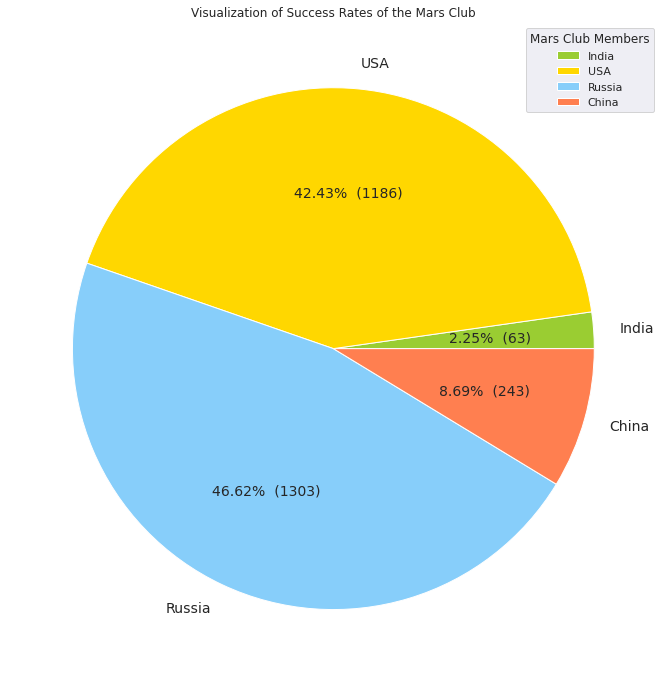

In [42]:
df_india=df[df["Country"]=="India"]
df_usa=df[df["Country"]=="USA"]
df_russia=df[df["Country"]=="Russia"]
df_china=df[df["Country"]=="China"]
india=(df_india["Status Mission"]=="Success").sum() 
usa=(df_usa["Status Mission"]=="Success").sum() 
russia=(df_russia["Status Mission"]=="Success").sum() 
china=(df_china["Status Mission"]=="Success").sum() 
plt.figure(figsize=(12,12))
countries=[india,usa,russia,china]
Lab=["India","USA","Russia","China"]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'coral']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(countries, labels = Lab, autopct=make_autopct(countries), colors = colors, textprops={'fontsize': 14})
plt.legend(Lab, loc="best", title ="Mars Club Members")
plt.title("Visualization of Success Rates of the Mars Club")